# About the Project

The world economy relies heavily on the energy sector, with crude oil being one of the most significant commodities in global trade. The price of crude oil, especially Brent crude oil, plays a crucial role in shaping economic policies, financial markets, and geopolitical dynamics. As a data scientist, understanding and predicting oil prices can offer valuable insights into market trends, investment decisions, and the overall health of the global economy.

In this data science project, we will focus on analyzing Brent crude oil prices using data sourced from oilpricesapi.com. This powerful API provides access to historical and real-time oil price data, enabling us to explore the intricate patterns of oil prices. By leveraging data science techniques, we aim to gain a understanding of the dynamics driving Brent crude oil prices.

## Today's Price
To retrieve the current Brent crude oil price (per barrel/159 litres), we will leverage the capabilities of the oilpricesapi.com API. By executing the following code snippet, we can obtain real-time data:
<div class = "alert alert-block alert-info">
    <b>Note: You need to register yourself on "https://www.oilpriceapi.com" and get your own API Key.</b>
</div>

In [5]:
import requests
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
#Paste Your API Key in the header
header = {"Authorization" : 'Token YOUR_API_KEY'}

#Sending a GET request to the API endpoint
response = requests.get("https://api.oilpriceapi.com/v1/prices/latest", headers =  header)

#Parsing the response
data = response.json()

#Extracting the required data
todayprice = data["data"]["price"]

print("The Current price of Brent Crude oil is USD",todayprice)

The Current price of Brent Crude oil is USD 80.41


## Last 30 days Oil prices
To retrieve the historical prices of Brent crude oil for the last 30 days, we can utilize the oilpricesapi.com API. By executing the following code snippet, we can gather the necessary data:
<div class = "alert alert-block alert-info">
    <b>Note: The Prices are in Daily average rate of crude oil.</b>
</div>

14 - 06 - 2023  -->  $74.33

15 - 06 - 2023  -->  $74.29

16 - 06 - 2023  -->  $75.85

17 - 06 - 2023  -->  $76.37

18 - 06 - 2023  -->  $76.35

19 - 06 - 2023  -->  $76.07

20 - 06 - 2023  -->  $75.88

21 - 06 - 2023  -->  $76.41

22 - 06 - 2023  -->  $75.57

23 - 06 - 2023  -->  $73.63

24 - 06 - 2023  -->  $74.31

25 - 06 - 2023  -->  $74.31

26 - 06 - 2023  -->  $74.28

27 - 06 - 2023  -->  $73.61

28 - 06 - 2023  -->  $73.02

29 - 06 - 2023  -->  $74.13

30 - 06 - 2023  -->  $74.85

01 - 07 - 2023  -->  $75.15

02 - 07 - 2023  -->  $75.15

03 - 07 - 2023  -->  $75.36

04 - 07 - 2023  -->  $75.60

05 - 07 - 2023  -->  $76.20

06 - 07 - 2023  -->  $76.42

07 - 07 - 2023  -->  $77.23

08 - 07 - 2023  -->  $78.23

09 - 07 - 2023  -->  $78.23

10 - 07 - 2023  -->  $77.96

11 - 07 - 2023  -->  $78.52

12 - 07 - 2023  -->  $79.76



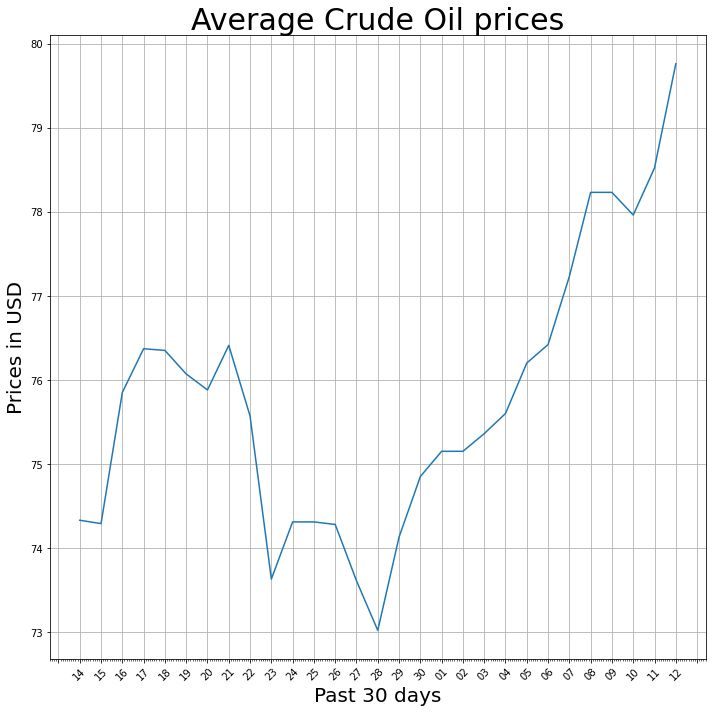

In [6]:
#Setting up the required parameters
param = {"by_type" : "daily_average_price"}

#Sending a GET request to the API endpoint
response = requests.get("https://api.oilpriceapi.com/v1/prices/past_month", headers =  {"Authorization" : 'Token YOUR_API_KEY'}, params = param)

#Parsing the Data
data = response.json()
dates = []
price = []

#Appending date and prices respectively in the list
for i in data["data"]["prices"]:
    d = i["created_at"]
    price.append(i["price"])
    dates.append(d[8:10])
    print(d[8:10],"-",d[5:7],"-",d[:4]," --> ",i["formatted"])
    print("")

#Plotting a Graph
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True
plt.plot(dates,price)
plt.xlabel("Past 30 days", fontsize = 20)
plt.ylabel("Prices in USD",fontsize = 20)
plt.title("Average Crude Oil prices",fontsize = 30)
ax = plt.gca().get_xaxis()
ax.set_major_locator(MultipleLocator(1))
ax.set_minor_locator(MultipleLocator(0.1))
for item in ax.get_ticklabels():
    item.set_rotation(45)
plt.grid()
plt.show()

## Save in Excel
To save the historical prices of Brent crude oil for the last 30 days in an Excel sheet, we can utilize the pandas library to create a dataframe and then export it to an Excel file. Here's the code snippet that saves the data:

In [14]:
## Save in direct Excel
import pandas as pd
year = []
month = []
date = []
rate = []

#Appending data into respective lists
for i in data["data"]["prices"]:
    d = i["created_at"]
    date.append(d[8:10])
    month.append(d[5:7])
    year.append(d[:4])
    rate.append(i["formatted"])

#Forming a Dataframe
df = pd.DataFrame(list(zip(date,month,year,rate)), columns = ['Date','Month','Year','Rate'])

#Saving it as an excel sheet
df.to_excel(f'{max(month)}-{max(year)} Oil prices.xlsx', index = False)

## Save in SQL
To save the historical prices of Brent crude oil for the last 30 days in an SQL, we can utilize the power of SQL and then export it as excel or sqlite file. Here's the code snipped for that:

In [13]:
## Save in SQLite
import pandas as pd
import sqlite3
year = []
month = []
date = []
rate = []

# Appending data into respective lists
for i in data["data"]["prices"]:
    d = i["created_at"]
    date.append(d[8:10])
    month.append(d[5:7])
    year.append(d[:4])
    rate.append(i["formatted"])

#Creating a new database
conn = sqlite3.connect(f'{max(month)}-{max(year)} Oil prices.sqlite')

#Forming a Dataframe
df = pd.DataFrame(list(zip(date,month,year,rate)), columns = ['Date','Month','Year','Rate'])

#Saving it in SQLite format
df.to_sql('Oil_Prices', conn, if_exists='replace', index=False)
conn.close()

###### In conclusion, this data science project focused on analyzing Brent crude oil prices using data sourced from oilpricesapi.com. By leveraging historical and real-time price data, we gained insights into market trends which can be used for predicting future price movements

###### I would like to express my gratitude to all the individuals and organizations who have contributed to the success of this data science project on Brent crude oil prices.
##### Thank you